To Predict the health insurance price prediction

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
Data=pd.read_csv("/content/Medical_insurance.csv")
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
Data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
Data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder()

encoded=encoder.fit_transform(Data[['sex','smoker', 'region']]).toarray()

encoded_Data=pd.DataFrame(encoded,columns=encoder.get_feature_names_out(['sex','smoker','region']))

Data_final = pd.concat([Data.drop(['sex','smoker','region'], axis=1), encoded_Data], axis=1)

Data_final

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,47,45.320,1,8569.86180,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2768,21,34.600,0,2020.17700,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2769,19,26.030,1,16450.89470,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2770,23,18.715,0,21595.38229,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


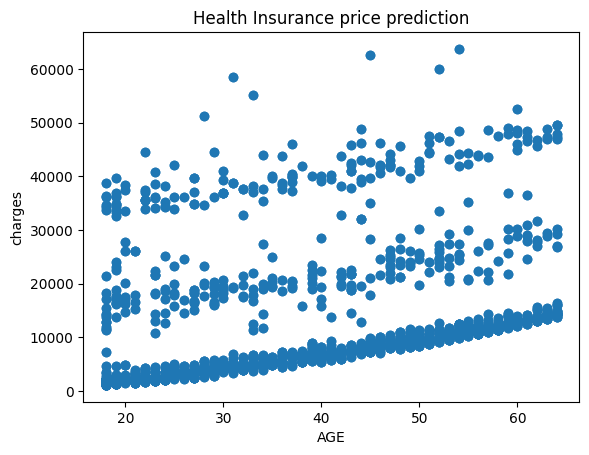

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(Data_final['age'],Data_final['charges'])
plt.xlabel("AGE")
plt.ylabel("charges")
plt.title("Health Insurance price prediction")
plt.show()

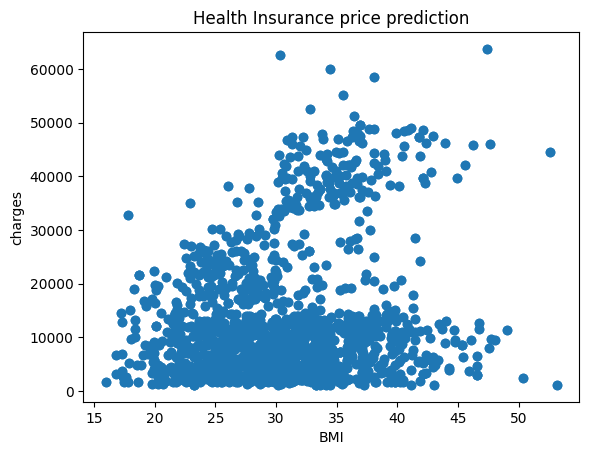

In [ ]:
plt.scatter(Data_final['bmi'],Data_final['charges'])
plt.xlabel("BMI")
plt.ylabel("charges")
plt.title("Health Insurance price prediction")
plt.show()

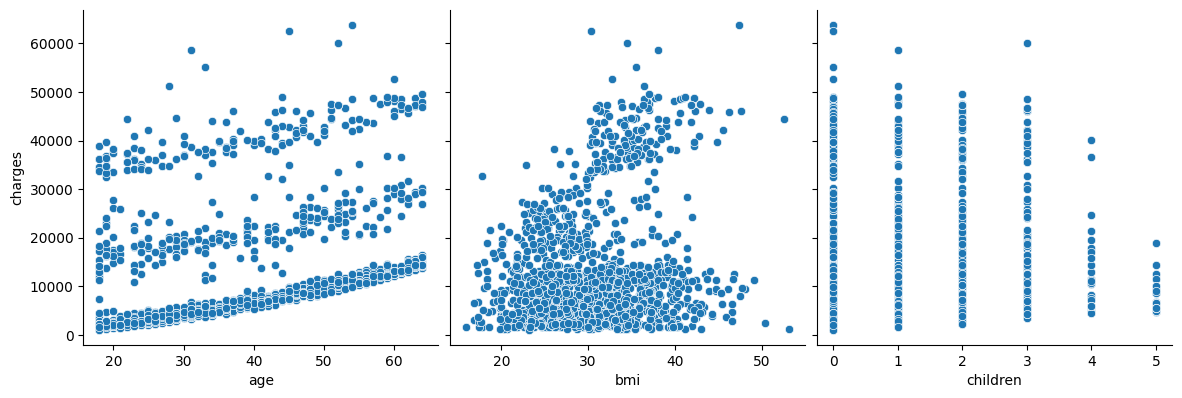

In [ ]:
import seaborn as sns

sns.pairplot(Data_final,x_vars=["age","bmi",'children'],y_vars='charges',height=4,aspect=1)
plt.show()

In [ ]:
X=Data_final.drop('charges',axis=1)
Y=Data_final['charges']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=55)

In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(X_train,Y_train)


LinearRegression()

In [ ]:
Y_pred=model.predict(X_test)
Y_pred

array([ 8.97784977e+03,  1.16790629e+04,  1.22542145e+04,  2.98145298e+04,
        3.73704166e+04,  4.07238195e+03,  1.10705896e+04, -6.60709630e+02,
        1.16993831e+04,  1.31109365e+04,  2.25355526e+03,  3.36593787e+02,
        1.35451171e+04,  1.30334113e+04,  1.07225920e+04,  1.02122583e+04,
        4.03397358e+04,  4.19227018e+03,  1.57025128e+04,  9.78597507e+03,
        1.56748545e+04,  8.54289058e+03,  1.05396162e+04, -7.10601097e+02,
        3.46783616e+04,  4.14923947e+03,  5.71412259e+03,  3.42034277e+04,
        3.41958607e+04,  5.76755448e+03,  6.80889136e+03,  1.24624538e+04,
        1.55568341e+04,  3.22768424e+03,  5.50499116e+03,  9.08815398e+03,
        1.04239182e+04,  6.44854147e+03,  7.36582779e+03,  1.45971874e+04,
        1.36127164e+04,  2.99252464e+04,  5.75906604e+03,  1.49045079e+04,
        9.16330662e+03,  3.76247132e+04,  3.58918455e+04,  4.72708003e+03,
        9.43687990e+03, -1.70803359e+03,  9.28999211e+03,  6.18961606e+03,
        1.50759649e+04,  

In [ ]:
Y_test.head()

,charges
948,6358.77645
992,10118.42400
715,12146.97100
2189,38792.68560
2212,43813.86610


In [ ]:
error = Y_test - Y_pred
error

,charges
948,-2619.073324
992,-1560.638947
715,-107.243541
2189,8978.155756
2212,6443.449509
...,...
904,-1726.868054
2601,7201.445818
361,-2027.736096
2768,-1930.632901


In [ ]:
model.score(X_train,Y_train)

0.7556968162042967

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Y_test_pred = model.predict(X_test)
print("R² on test:", r2_score(Y_test, Y_test_pred))
print("MSE on test:", mean_squared_error(Y_test, Y_test_pred))
print("MAE on test:", mean_absolute_error(Y_test, Y_test_pred))

R² on test: 0.7284532755349784
MSE on test: 36595406.53443213
MAE on test: 4189.17810757176


In [ ]:
print("coefficient:",model.coef_[0])
print("intercept:",model.intercept_)

coefficient: 262.87787883678664
intercept: -774.5686447270928


In [ ]:
o=model.predict([[19,0,27.9,0,1,3]])
              #age#sex#bmi#children#smoker#region
o

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 6 features, but LinearRegression is expecting 11 features as input.

In [ ]:
# Example prediction
sample = pd.DataFrame({
    "age": [45],
    "bmi": [27.9],
    "children": [0],
    "sex_female":[0],
    "sex_male": [1],
    "smoker_no":[0],
    "smoker_yes": [1],
    "region_northeast":[0],
    "region_northwest": [0],
    "region_southeast": [0],
    "region_southwest": [1],

})
print("Predicted charge:", model.predict(sample))

Predicted charge: [32060.71755185]


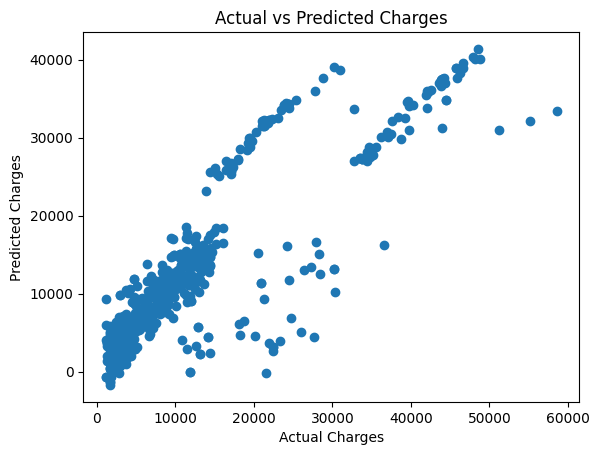

In [ ]:
plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()
